In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Understanding the Features

In [2]:
ma = pd.read_csv(r"C:\Users\XNovaQ.9\Downloads\archive (5)\social_media_engagement1.csv")
ma

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive
...,...,...,...,...,...,...,...,...,...
95,96,Instagram,carousel,7/12/2023 17:45,36,294,911,Wednesday,positive
96,97,Twitter,video,10/27/2023 23:45,314,108,458,Friday,neutral
97,98,Twitter,text,8/5/2023 8:45,229,179,38,Saturday,positive
98,99,Instagram,poll,12/29/2023 12:15,5000,500,204,Friday,positive


In [49]:
ma['sentiment_score'].value_counts()

sentiment_score
positive    46
neutral     27
negative    27
Name: count, dtype: int64

In [26]:
ma.describe(include=object)

,platform,post_type,post_time,post_day,sentiment_score
count,100,100,100,100,100
unique,3,5,99,7,3
top,Instagram,carousel,5/2/2023 6:15,Wednesday,positive
freq,36,26,2,18,46


In [9]:
ma.head()

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive


In [8]:
ma.count()

post_id            100
platform           100
post_type          100
post_time          100
likes              100
comments           100
shares             100
post_day           100
sentiment_score    100
dtype: int64

In [17]:
ma.columns

Index(['post_id', 'platform', 'post_type', 'post_time', 'likes', 'comments',
       'shares', 'post_day', 'sentiment_score'],
      dtype='object')

Finding and deleting the Null values , Duplicate values :

In [20]:
ma.isnull().sum()

post_id            0
platform           0
post_type          0
post_time          0
likes              0
comments           0
shares             0
post_day           0
sentiment_score    0
dtype: int64

In [25]:
ma.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

Finding Outliers for Each coloumns :


In [52]:
numerical = ma.select_dtypes(include='number').columns

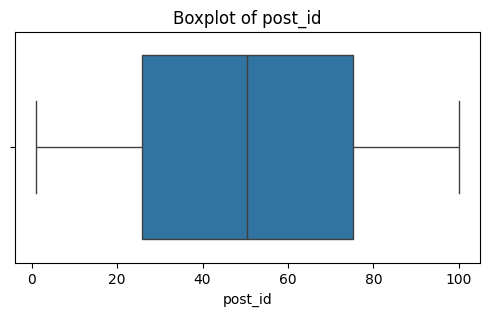

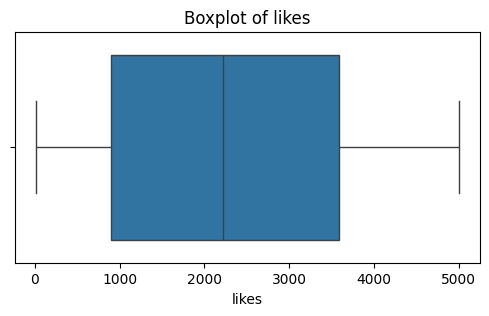

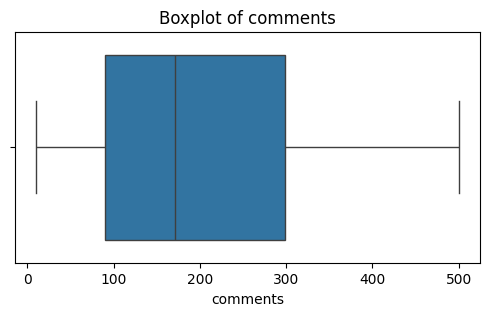

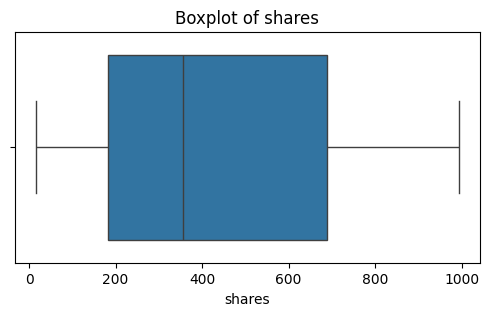

In [53]:
for col in numerical:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=ma[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Distribution for each Columns :

In [55]:
categorical = ma.select_dtypes(include='object').columns

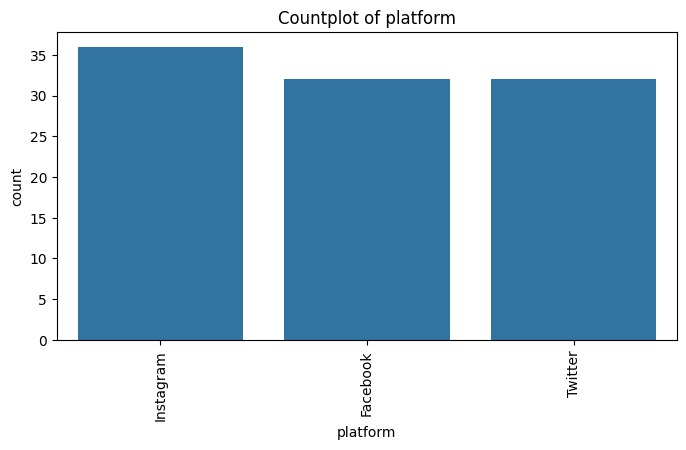

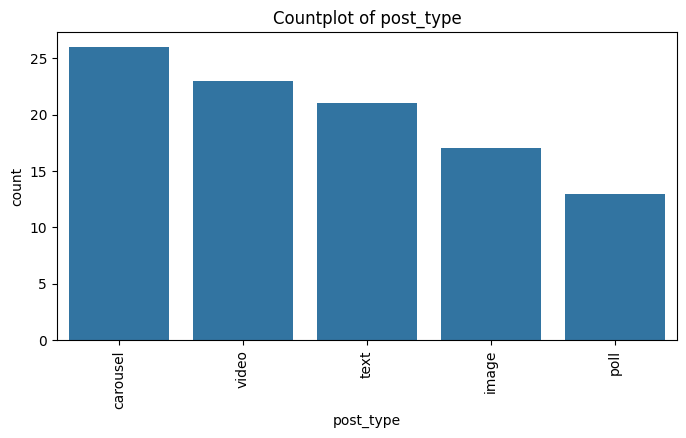

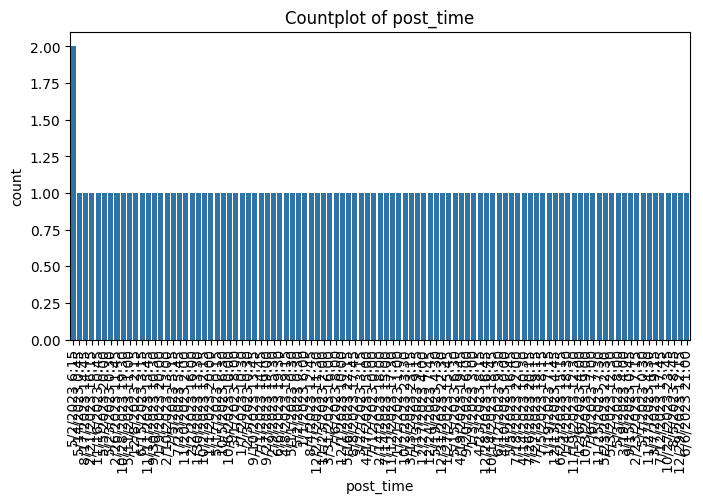

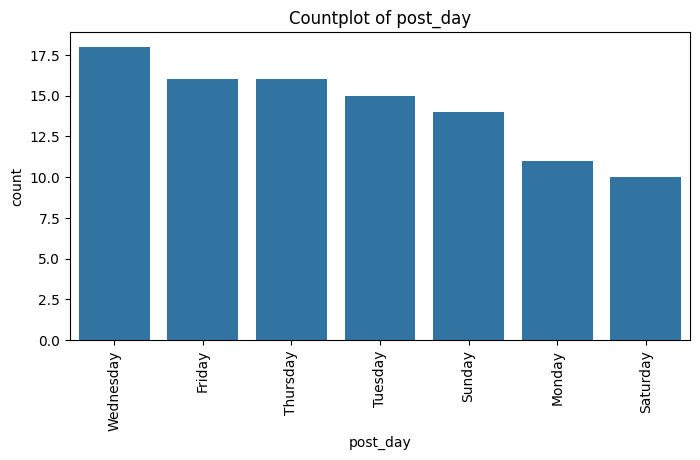

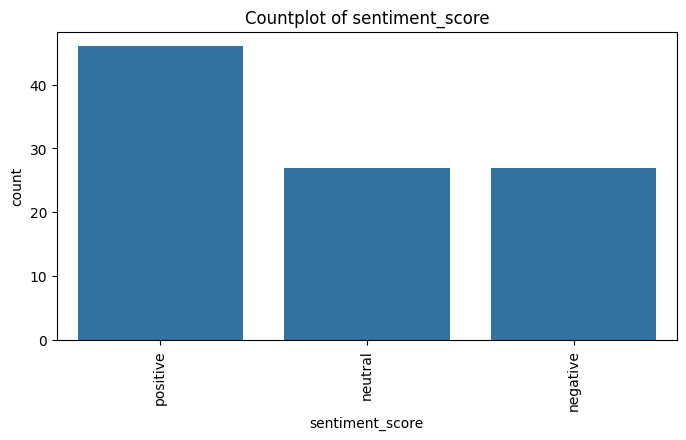

In [56]:
for col in categorical:
    plt.figure(figsize=(8,4))
    sns.countplot(x=ma[col], order=ma[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=90)
    plt.show()

In [64]:
col = ['post_id','post_day','post_time']
ba = ma.drop(columns=col)
print(ba)

     platform post_type  likes  comments  shares sentiment_score
0    Facebook     image   2121       474     628        positive
1    Facebook  carousel   3660       432     694         neutral
2   Instagram      poll   4955       408     688        negative
3     Twitter     image   1183        90     187        negative
4     Twitter     video   3499       247     286        positive
..        ...       ...    ...       ...     ...             ...
95  Instagram  carousel     36       294     911        positive
96    Twitter     video    314       108     458         neutral
97    Twitter      text    229       179      38        positive
98  Instagram      poll   5000       500     204        positive
99  Instagram     image   4483       357      25         neutral

[100 rows x 6 columns]


In [66]:
ba

,platform,post_type,likes,comments,shares,sentiment_score
0,Facebook,image,2121,474,628,positive
1,Facebook,carousel,3660,432,694,neutral
2,Instagram,poll,4955,408,688,negative
3,Twitter,image,1183,90,187,negative
4,Twitter,video,3499,247,286,positive
...,...,...,...,...,...,...
95,Instagram,carousel,36,294,911,positive
96,Twitter,video,314,108,458,neutral
97,Twitter,text,229,179,38,positive
98,Instagram,poll,5000,500,204,positive


Correlation :

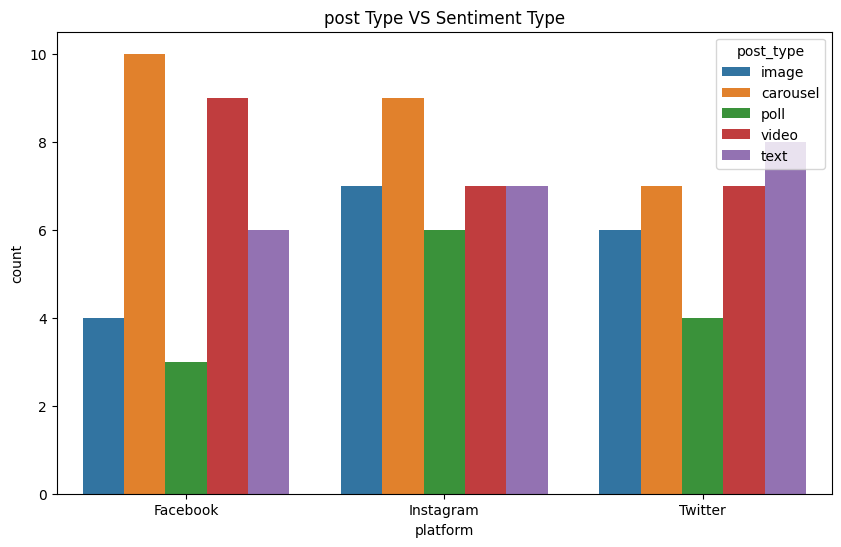

In [75]:
plt.figure(figsize=(10,6))
sns.countplot(x="platform",hue="post_type",data = ba)
plt.title("post Type VS Sentiment Type")
plt.show()


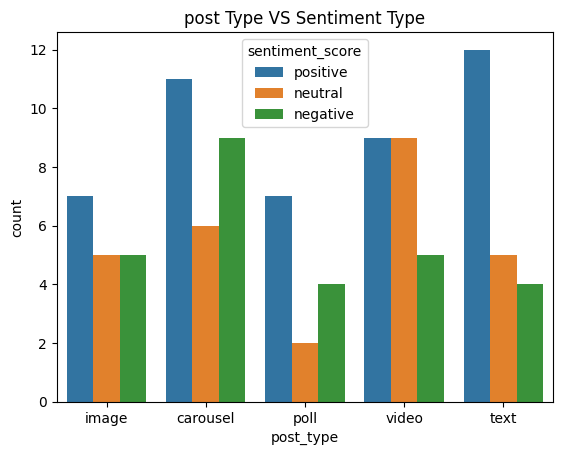

In [67]:
sns.countplot(x="post_type",hue="sentiment_score",data = ba)
plt.title("post Type VS Sentiment Type")
plt.show()

In [76]:
ba

,platform,post_type,likes,comments,shares,sentiment_score
0,Facebook,image,2121,474,628,positive
1,Facebook,carousel,3660,432,694,neutral
2,Instagram,poll,4955,408,688,negative
3,Twitter,image,1183,90,187,negative
4,Twitter,video,3499,247,286,positive
...,...,...,...,...,...,...
95,Instagram,carousel,36,294,911,positive
96,Twitter,video,314,108,458,neutral
97,Twitter,text,229,179,38,positive
98,Instagram,poll,5000,500,204,positive


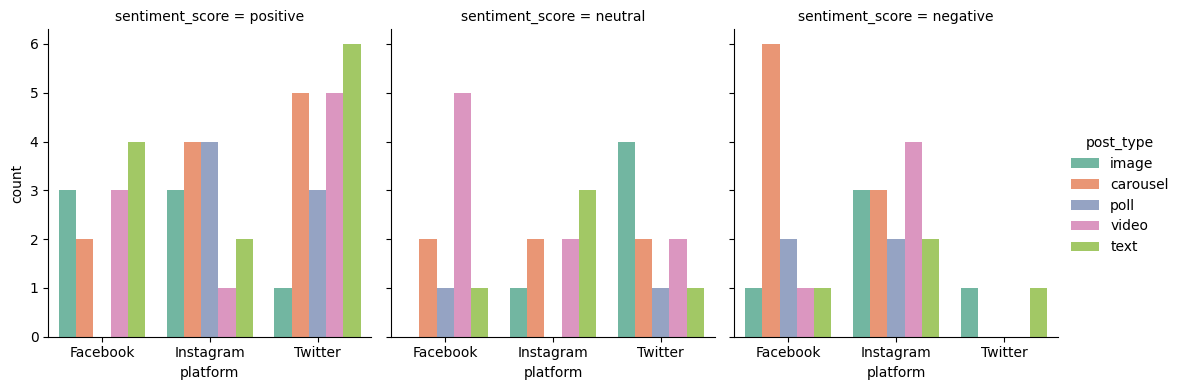

In [105]:
sns.catplot(x="platform", hue="post_type", col="sentiment_score",
                data=ba, kind="count", height=4, aspect=0.9, palette="Set2")

CONCLUSION : We can post a text in twitter , to get more postive sentiment.

In [80]:
ba

,platform,post_type,likes,comments,shares,sentiment_score
0,Facebook,image,2121,474,628,positive
1,Facebook,carousel,3660,432,694,neutral
2,Instagram,poll,4955,408,688,negative
3,Twitter,image,1183,90,187,negative
4,Twitter,video,3499,247,286,positive
...,...,...,...,...,...,...
95,Instagram,carousel,36,294,911,positive
96,Twitter,video,314,108,458,neutral
97,Twitter,text,229,179,38,positive
98,Instagram,poll,5000,500,204,positive


C:\Users\XNovaQ.9\AppData\Local\Temp\ipykernel_9152\1078825639.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="post_type", y="likes", hue="platform", data=ba, ci=None, palette="Set2")


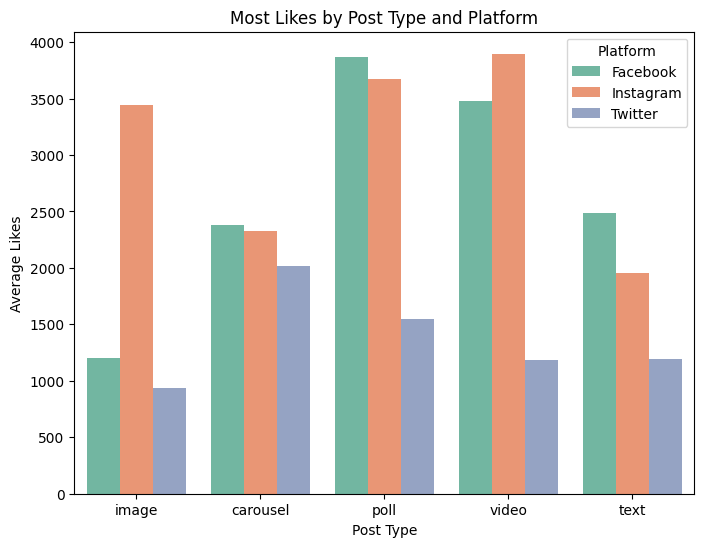

In [104]:

plt.figure(figsize=(8,6))

sns.barplot(x="post_type", y="likes", hue="platform", data=ba, ci=None, palette="Set2")

plt.title("Most Likes by Post Type and Platform")
plt.xlabel("Post Type")
plt.ylabel("Average Likes")
plt.legend(title="Platform")
plt.show()


C:\Users\XNovaQ.9\AppData\Local\Temp\ipykernel_9152\1387771903.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="post_type", y="likes", hue="platform",


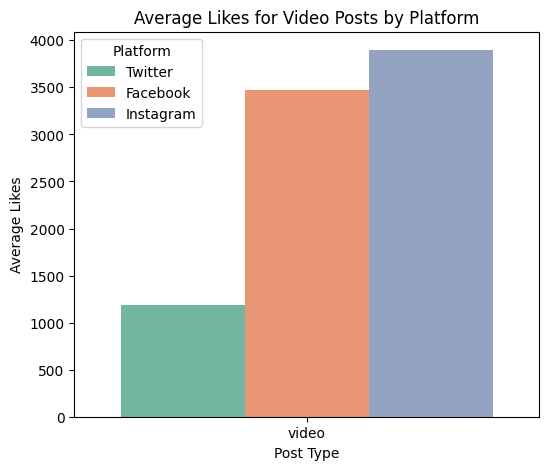

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only "video" rows
video_data = ba[ba["post_type"] == "video"]

plt.figure(figsize=(6,5))

sns.barplot(x="post_type", y="likes", hue="platform",
            data=video_data, ci=None, palette="Set2")

plt.title("Average Likes for Video Posts by Platform")
plt.xlabel("Post Type")
plt.ylabel("Average Likes")
plt.legend(title="Platform")
plt.show()


CONCLUSION :
             The Video post has been get more like is instagram . So, our image get more popular in Instagram while put like a Carousel .